In [170]:
import librosa as lb
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import soundfile as sf
from IPython.display import Audio
import numpy as np
from scipy.io.wavfile import write
from scipy.signal import stft
import scipy.signal as sp
from scipy.signal import spectrogram

In [172]:
#A1. Transform the speech signal to its spectral domain
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio,sr=None)
print("Sample Rate:",samprate)

Sample Rate: 44100


In [179]:
print("Original Signal:")
Audio(data=signal, rate=samprate)

Original Signal:


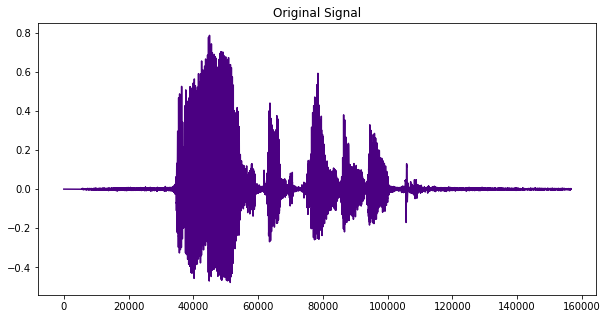

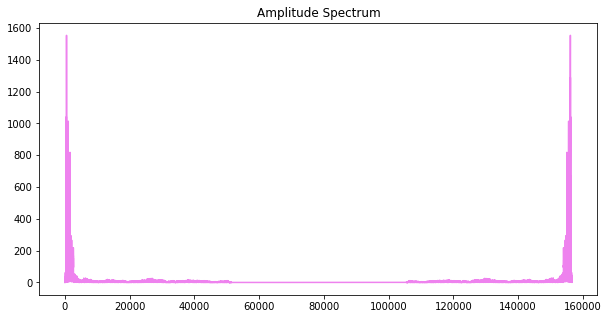

In [186]:
FT=np.fft.fft(signal)

plt.figure(figsize=(10,5))
plt.plot(signal,color='indigo')
plt.title('Original Signal')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(np.abs(FT),color='violet')
plt.title("Amplitude Spectrum")
plt.show()

[-8.70763157e-18-1.57669924e-18j -8.70763157e-18-1.09610714e-17j
  2.17690789e-17-2.56006352e-17j ...  1.25122070e-03+3.79275899e-19j
  1.34277344e-03-1.92740920e-18j  1.40380859e-03+2.67553571e-17j]


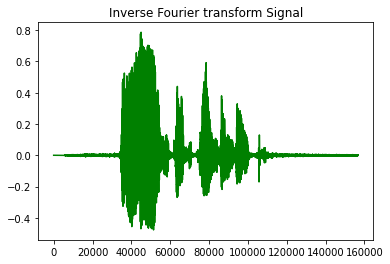

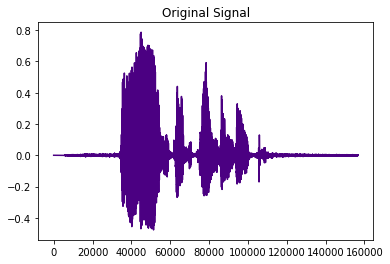

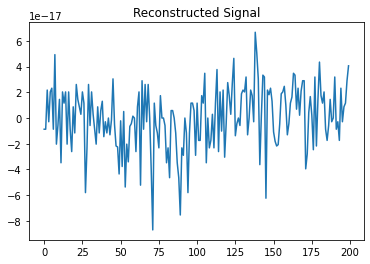

In [197]:
#A2. Inverse transform the frequency spectrum of the speech signal from frequency domain to time domain.
IFT=np.fft.ifft(FT)
print(IFT)
plt.plot(IFT.real,color='green')
plt.title('Inverse Fourier transform Signal')
plt.show()

plt.plot(signal,color='indigo')
plt.title('Original Signal')
plt.show()

plt.plot(np.real(IFT[:200]))
plt.title('Reconstructed Signal')
plt.show()

The original signal and signal obtained after Inverse Fourier Transform are same

In [158]:
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio,sr=None)
print("Sample Rate:",samprate)

Sample Rate: 44100


In [210]:
#A3. Spectral analysis of a word present in the recorded speech
word_signal = signal[30000:50000]
display(Audio(data=word_signal,rate=samprate))
print('The word id AI')
word_fft=np.fft.fft(word_signal)

The word id AI


In [250]:
write("word_signal.wav",samprate,word_signal)

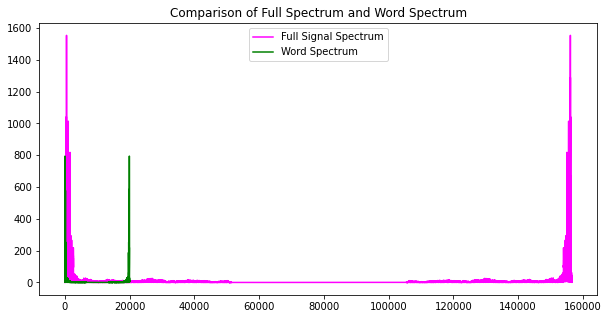

In [211]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(FT),label="Full Signal Spectrum",color='magenta')
plt.plot(np.abs(word_fft),label="Word Spectrum",color='green')
plt.legend()
plt.title("Comparison of Full Spectrum and Word Spectrum")
plt.show()

In [217]:
#A4. Rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components
window_length=0.02
window=(int(window_length*samprate))
rectangularwindow=np.ones(window)
rect_fft = np.fft.fft(rectangularwindow)

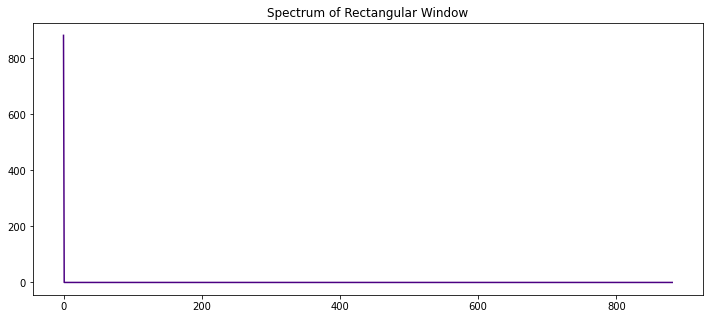

In [222]:
plt.figure(figsize=(12,5))
plt.plot(np.abs(rect_fft),color='indigo')
plt.title("Spectrum of Rectangular Window")
plt.show()

In [226]:
#A5. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display 
# the matrix.
window_length=0.02
window_samples=int(window_length*samprate)
hop = window_samples // 2  
stft_res=librosa.stft(signal, n_fft=window_samples, hop_length=hop)
spectrogram=np.abs(stft_res)

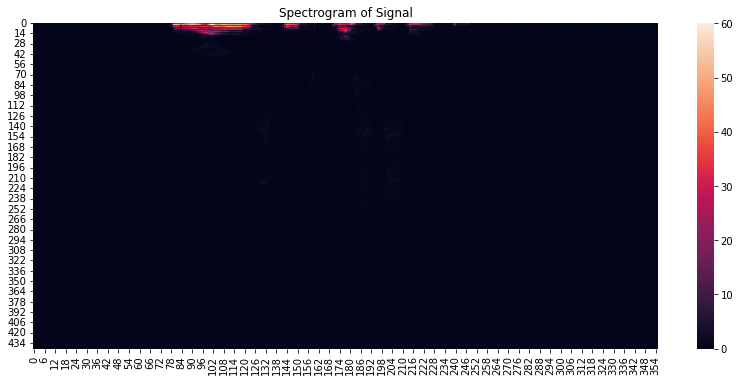

In [240]:
plt.figure(figsize=(14,6))
sns.heatmap(spectrogram,cmap=None)
plt.title('Spectrogram of Signal')
plt.show()

C:\Users\rayva\AppData\Local\Temp\ipykernel_14460\1032812092.py:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(spectrogram_matrix),aspect='auto',origin='lower',cmap='crest')


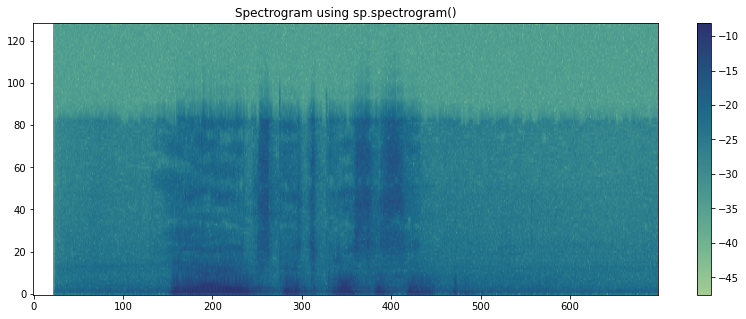

scipy.signal imported as sp


In [249]:
#A6. Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots
frequency,time,spectrogram_matrix=sp.spectrogram(signal,samprate)
plt.figure(figsize=(14,5))
plt.imshow(np.log(spectrogram_matrix),aspect='auto',origin='lower',cmap='crest')
plt.colorbar()
plt.title("Spectrogram using sp.spectrogram()")
plt.show()
print('scipy.signal imported as sp')